In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [18]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X, Y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

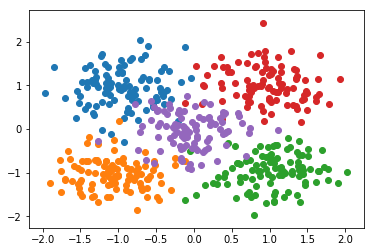

In [19]:
plt.scatter(X[Y==0,0], X[Y==0, 1])
plt.scatter(X[Y==1,0], X[Y==1, 1])
plt.scatter(X[Y==2,0], X[Y==2, 1])
plt.scatter(X[Y==3,0], X[Y==3, 1])
plt.scatter(X[Y==4,0], X[Y==4, 1])

In [20]:
y_cat = to_categorical(Y, 5)  #one-hot-encoding
# print(y_cat)

In [21]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x=X,y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 361us/step - loss: 1.0530 - acc: 0.6300
Epoch 2/100
500/500 [==============================] - 0s 21us/step - loss: 0.5452 - acc: 0.8240
Epoch 3/100
500/500 [==============================] - 0s 23us/step - loss: 0.3746 - acc: 0.9220
Epoch 4/100
500/500 [==============================] - 0s 21us/step - loss: 0.3057 - acc: 0.9340
Epoch 5/100
500/500 [==============================] - 0s 19us/step - loss: 0.2683 - acc: 0.9460
Epoch 6/100
500/500 [==============================] - 0s 22us/step - loss: 0.2441 - acc: 0.9500
Epoch 7/100
500/500 [==============================] - 0s 24us/step - loss: 0.2294 - acc: 0.9500
Epoch 8/100
500/500 [==============================] - 0s 22us/step - loss: 0.2191 - acc: 0.9440
Epoch 9/100
500/500 [==============================] - 0s 22us/step - loss: 0.2103 - acc: 0.9480
Epoch 10/100
500/500 [==============================] - 0s 22us/step - loss: 0.2029 - acc: 0.9480
Epoch 11/100
500/500 [======

500/500 [==============================] - 0s 23us/step - loss: 0.1509 - acc: 0.9520
Epoch 85/100
500/500 [==============================] - 0s 25us/step - loss: 0.1521 - acc: 0.9520
Epoch 86/100
500/500 [==============================] - 0s 21us/step - loss: 0.1516 - acc: 0.9520
Epoch 87/100
500/500 [==============================] - 0s 20us/step - loss: 0.1546 - acc: 0.9500
Epoch 88/100
500/500 [==============================] - 0s 23us/step - loss: 0.1531 - acc: 0.9440
Epoch 89/100
500/500 [==============================] - 0s 22us/step - loss: 0.1513 - acc: 0.9520
Epoch 90/100
500/500 [==============================] - 0s 22us/step - loss: 0.1511 - acc: 0.9520
Epoch 91/100
500/500 [==============================] - 0s 25us/step - loss: 0.1512 - acc: 0.9500
Epoch 92/100
500/500 [==============================] - 0s 21us/step - loss: 0.1513 - acc: 0.9520
Epoch 93/100
500/500 [==============================] - 0s 22us/step - loss: 0.1539 - acc: 0.9460
Epoch 94/100
500/500 [===========

In [23]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [4]


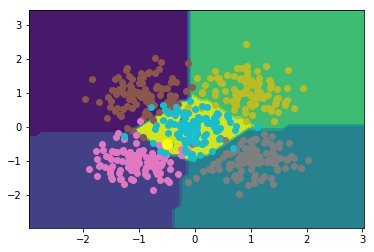

In [25]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.scatter(X[Y==2, 0], X[Y==2, 1])
plt.scatter(X[Y==3, 0], X[Y==3, 1])
plt.scatter(X[Y==4, 0], X[Y==4, 1])
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.scatter(X[Y==2, 0], X[Y==2, 1])
plt.scatter(X[Y==3, 0], X[Y==3, 1])
plt.scatter(X[Y==4, 0], X[Y==4, 1])
 
x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)